In [7]:
%matplotlib inline

In [8]:
import numpy as np, scipy as sp
import scipy.io
import scipy.signal as signal
import scipy.fftpack as ftpk
import matplotlib.pyplot as plt
import matplotlib

from imp import reload
import auxfilter
import matlabtools
import glob

In [9]:
matplotlib.style.use('ggplot')

In [10]:
ssmall,smed, slarge, slong = (4,3), (8,6), (16,12), (16,4)
matplotlib.rcParams['figure.figsize'] = slarge

Functions

In [11]:
def pltcwt(plt, my_cwt, widths, realize=None):
    hi = np.max(widths)
    lo = np.min(widths)
    if realize == 'abs':
        my_cwt = np.abs(my_cwt)
    elif realize == 'ang':
        my_cwt = np.angle(my_cwt)
    plt.imshow(my_cwt, extent=[-1, 1, hi, lo], cmap='seismic', aspect='auto',
           vmax=abs(my_cwt).max(), vmin=-abs(my_cwt).max())
    
def plt_easycwt(plt, sig, widths):
    my_cwt = signal.cwt(sig, signal.ricker, widths)
    pltcwt(plt, my_cwt, widths)

Data loading section

In [7]:
basepath = '/home/mike/Downloads/train_1/'
path = basepath + '1_1_1.mat'
rawdata = tools.matlabtools.get_matlab_eeg_data(path)
data = rawdata['data']
print(data.shape)
SR = rawdata['iEEGsamplingRate'][0][0]
if SR == int(SR):
    SR = int(SR)
print(SR)

(240000, 16)
400


In [8]:
brief = data[:SR*120]
brief.shape

(48000, 16)

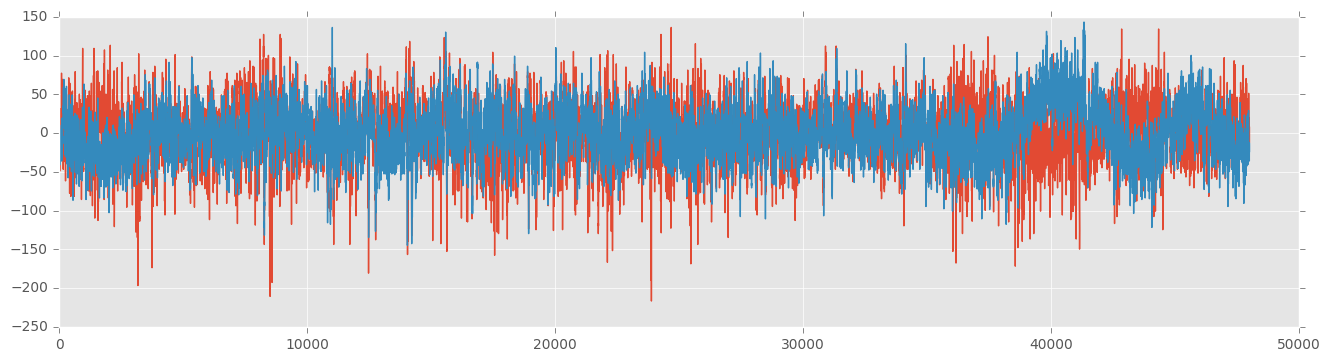

In [9]:
plt.plot(brief[:,:2])

In [10]:
eeg1 = brief[:,0]
eeg2 = brief[:,1]

In [11]:
lo, hi = 1, 16
nbins = 32
widths = np.linspace(lo, hi, nbins)**2

In [14]:
data.shape

(240000, 16)

In [42]:
sig = data[:, 0]
fsig = ftpk.fft(data, axis=0)
t = np.linspace(0, 400, len(fsig))

fsig.shape


(240000, 16)

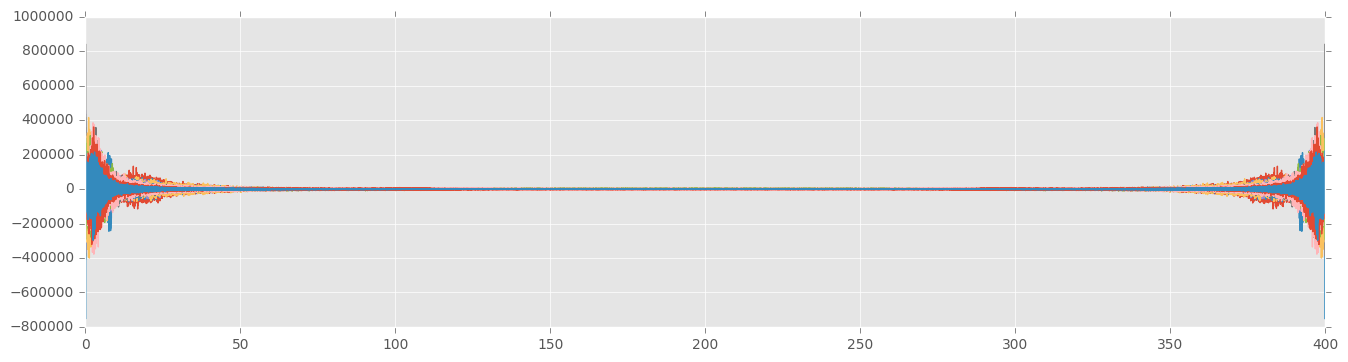

In [24]:
plt.plot(np.linspace(0, 400, len(fsig)), fsig)

In [28]:
sources1 = glob.glob(basepath + '*_1.mat') 
sources0 = glob.glob(basepath + '*_0.mat') 


In [64]:
limit = 20
dataset0 = [ tools.matlabtools.get_matlab_eeg_data(path)['data'] for path in sources0[:limit]]
dataset1 = [ tools.matlabtools.get_matlab_eeg_data(path)['data'] for path in sources1[:limit]]


In [65]:
dataset0[0].shape

(240000, 16)

In [66]:
spectra = [ftpk.fft(datas, axis=0) for datas in dataset0]
spectra = np.array(spectra)
spectra1 = np.array([ftpk.fft(datas, axis=0) for datas in dataset1])
spectra.shape

(20, 240000, 16)

In [67]:
flat = np.average(spectra, axis=0)
flatstd = np.std(spectra, axis=0)
flat1 = np.average(spectra1, axis=0)
flatstd1 = np.std(spectra1, axis=0)
flat.shape

(240000, 16)

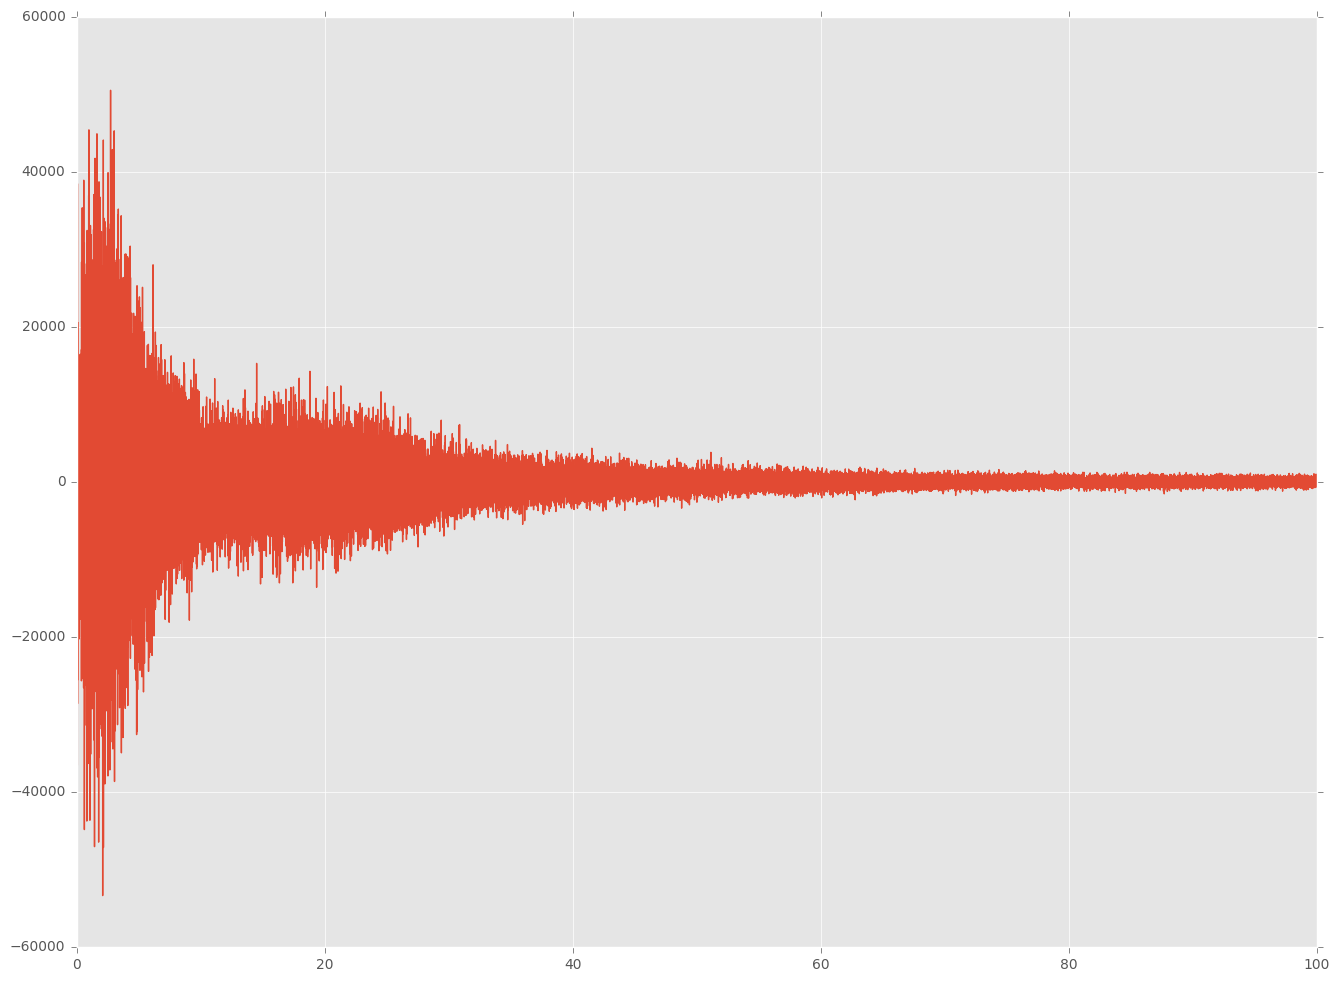

In [68]:
cut = 100*240000/400
plt.plot(t[:cut], flat[:cut,0])

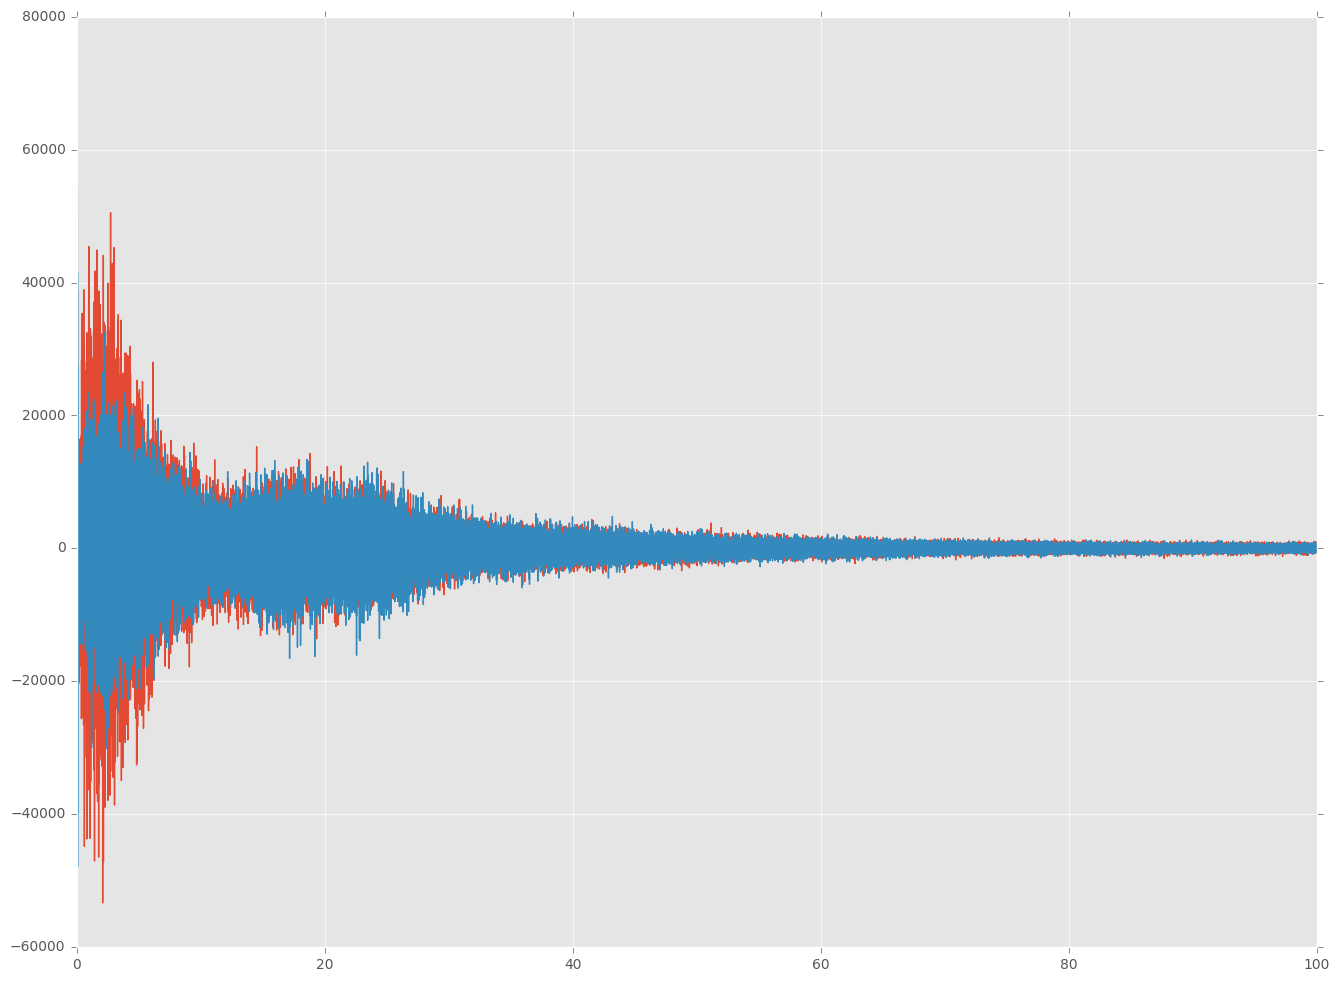

In [69]:
plt.plot(t[:cut], flat[:cut,0])
plt.plot(t[:cut], flat1[:cut,0])

60000

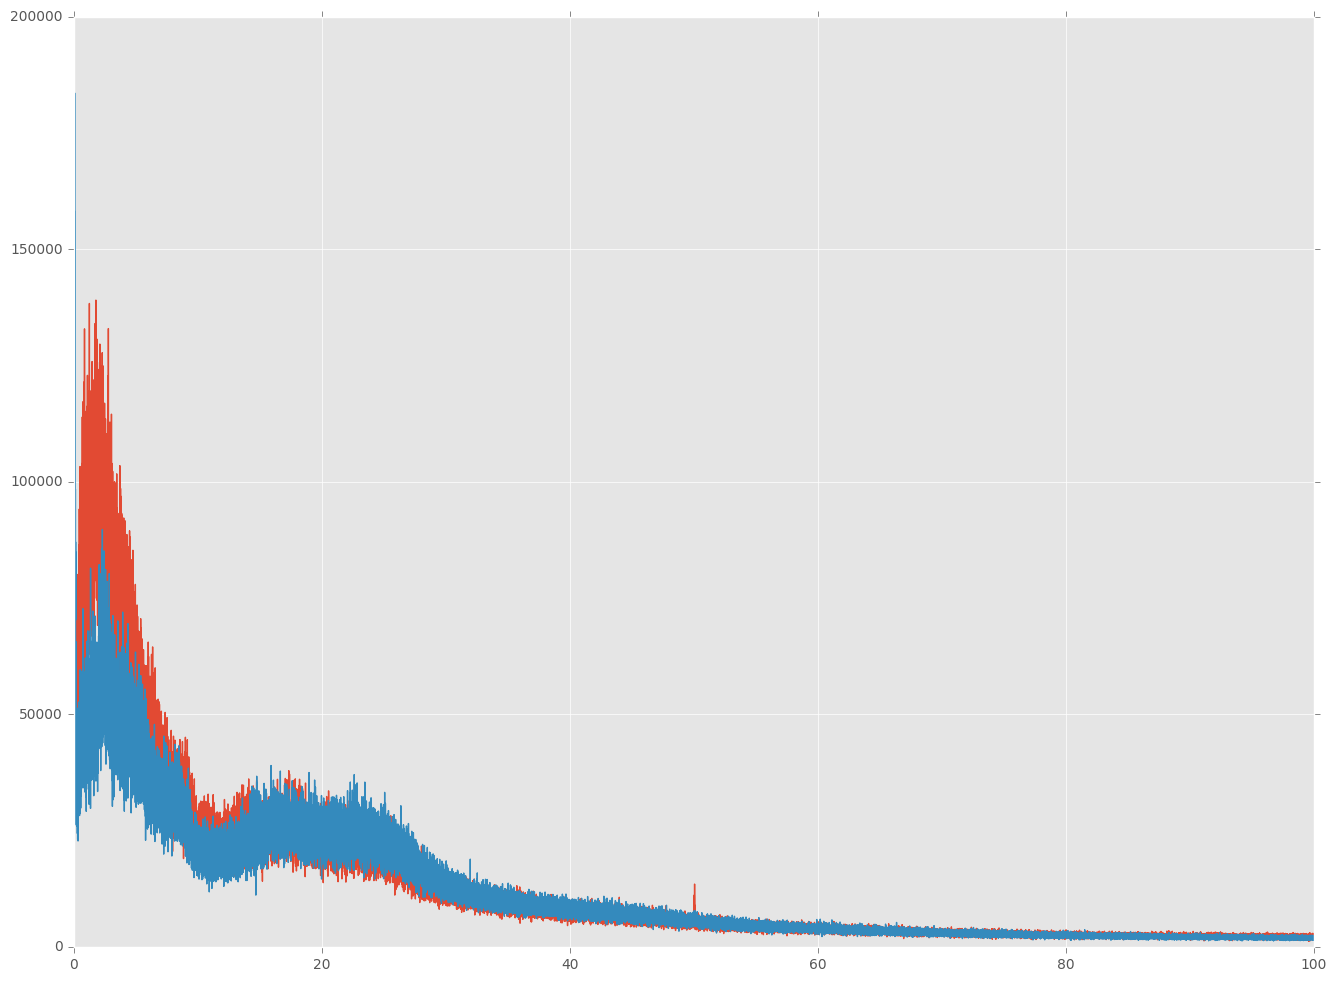

In [73]:
plt.plot(t[:cut], flatstd[:cut,0])
plt.plot(t[:cut], flatstd1[:cut,0])
len(t[:cut])

In [74]:
len(t)/400

600